# Data cleaning

#### Ici nous avons un dataset déjà trié par un collègue. Mon but ici est juste de repasser dessus pour qu'il corresponde à mes attentes

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/immoCollect52c.csv', index_col=0)
df

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,...,swimming_pool,state_of_the_building,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
4,7912,0,550000,4,325,1,0,1,1,3570.0,...,0,good,Frasnes-lez-Anvaing,Ath,hainaut,6.0,wallonie,1.0,9.0,-1.488515
6,1650,0,525000,4,220,1,1,1,1,1600.0,...,0,good,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,0,1,1,2004.0,...,0,as new,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,1,0,1,591.0,...,0,as new,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,0,1,1,559.0,...,0,as new,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59138,3210,0,495000,4,231,0,0,1,0,374.0,...,0,as new,Lubbeek,Leuven,brabant-flamand,5.0,flandre,0.0,2.0,-2.483942
59145,2310,0,468000,3,180,1,0,0,0,0.0,...,0,None,Rijkevorsel,Turnhout,anvers,2.0,flandre,0.0,22.0,-1.905413
59150,1800,0,454993,3,169,0,0,0,0,389.0,...,0,None,Vilvoorde,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.633313
59152,3530,0,475000,3,222,0,0,0,0,1124.0,...,0,None,Houthalen-Helchteren,Maaseik,limbourg,7.0,flandre,0.0,26.0,-2.208714


In [2]:
df.isna().sum()

postal_code                   0
type_of_property              0
price                         0
number_of_rooms               0
house_area                    0
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
garden                        0
surface_of_the_land       23458
number_of_facades             0
swimming_pool                 0
state_of_the_building         0
locality                      0
district                      0
province                      0
province_int                  0
region                        0
region_int                    0
district_int                  0
ratio_free_build              0
dtype: int64

In [3]:
# 23k na from surface_of_the_land, i drop the collumn
df.drop(columns=['surface_of_the_land'],inplace=True)
# df.isna().sum()
df.shape

(44372, 20)

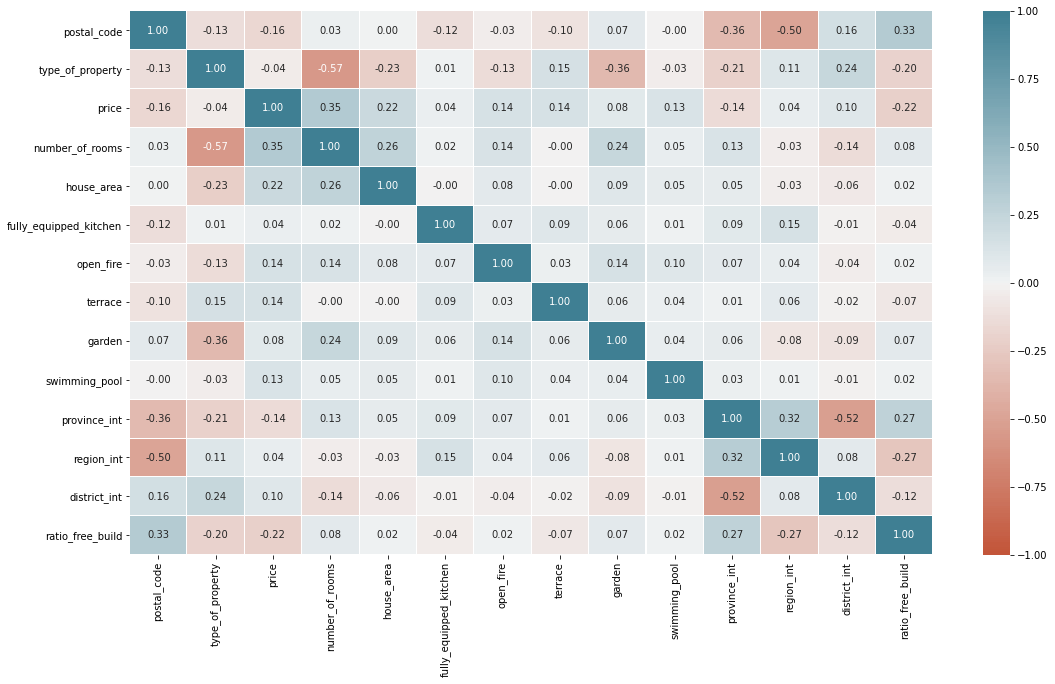

In [4]:
# Print the global heatmap
plt.subplots(figsize=(18, 10))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [5]:
df.dtypes

postal_code                 int64
type_of_property            int64
price                       int64
number_of_rooms             int64
house_area                  int64
fully_equipped_kitchen      int64
open_fire                   int64
terrace                     int64
garden                      int64
number_of_facades          object
swimming_pool               int64
state_of_the_building      object
locality                   object
district                   object
province                   object
province_int              float64
region                     object
region_int                float64
district_int              float64
ratio_free_build          float64
dtype: object

## SPLIT FOR HOUSE CLEANING

In [6]:
df = df[df['type_of_property'] == 0]
df.drop(columns=['type_of_property'],inplace=True)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


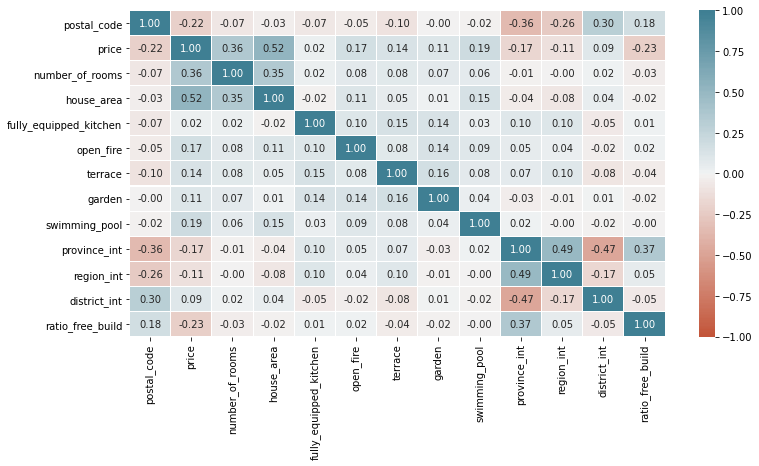

In [7]:
# Print the global heatmap
plt.subplots(figsize=(12, 6))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

#### Let's cleaning this for my model prediction !

In [8]:
for columnName in df.keys():
    print(df[columnName].value_counts())

7700    302
9600    256
3700    245
9500    222
4800    219
       ... 
6686      1
1476      1
3381      1
8953      1
6542      1
Name: postal_code, Length: 1034, dtype: int64
249000    331
299000    316
295000    294
275000    283
225000    264
         ... 
366314      1
288500      1
358150      1
304972      1
382797      1
Name: price, Length: 1913, dtype: int64
3    10590
4     6194
2     3629
1      501
Name: number_of_rooms, dtype: int64
150    757
140    648
160    613
200    602
120    569
      ... 
615      1
551      1
487      1
471      1
32       1
Name: house_area, Length: 531, dtype: int64
1    14535
0     6379
Name: fully_equipped_kitchen, dtype: int64
0    19365
1     1549
Name: open_fire, dtype: int64
1    11422
0     9492
Name: terrace, dtype: int64
0    11091
1     9823
Name: garden, dtype: int64
2       6972
3       5542
4       5510
None    2762
1        128
Name: number_of_facades, dtype: int64
0    20535
1      379
Name: swimming_pool, dtype: int64
good    

In [9]:
def facade_assign(element):
    if element == None or element == "None":
        element = 1
        return int(element)
    else: 
        element = element
        return int(element)
df['number_of_facades'] = df['number_of_facades'].apply(facade_assign)
df['number_of_facades'].value_counts()

<ipython-input-9-b44b04b7af12>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_facades'] = df['number_of_facades'].apply(facade_assign)


2    6972
3    5542
4    5510
1    2890
Name: number_of_facades, dtype: int64

In [10]:
# suppression des collonnes inutiles/ contenant trop de valeurs manquantes
df.drop(columns=['open_fire'],inplace=True)
# df.drop(columns=['number_of_facades'],inplace=True)
# df.drop(columns=['swimming_pool'],inplace=True)
# df.drop(columns=['state_of_the_building'],inplace=True)


### Postal Code 

(array([416., 282., 230., 304., 470., 263., 130., 209., 348., 148., 162.,
        178., 144., 257., 232., 191., 200., 237., 147.,   0., 471., 191.,
        218., 255., 123., 187., 186., 181., 359., 181., 317., 320., 202.,
        652., 239.,  77., 159., 149., 345., 162., 249.,  77., 382., 165.,
        195., 142., 100.,  61.,  94.,   0., 295., 211.,   4.,   0.,   0.,
        253., 270., 235., 117.,   0.,  76., 107.,  62., 167., 173., 132.,
        328., 365., 217.,   0., 310.,  61., 149.,  61., 430., 139., 174.,
        150.,  34.,   0.,  80., 269., 283., 441., 343., 224., 398., 184.,
        323., 255., 304., 324., 332., 194., 302., 377., 319.,  90., 183.,
        182.]),
 array([1000.  , 1089.92, 1179.84, 1269.76, 1359.68, 1449.6 , 1539.52,
        1629.44, 1719.36, 1809.28, 1899.2 , 1989.12, 2079.04, 2168.96,
        2258.88, 2348.8 , 2438.72, 2528.64, 2618.56, 2708.48, 2798.4 ,
        2888.32, 2978.24, 3068.16, 3158.08, 3248.  , 3337.92, 3427.84,
        3517.76, 3607.68, 3697.6 ,

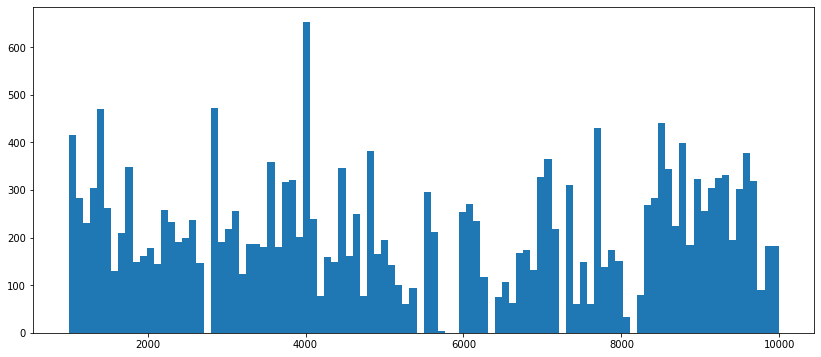

In [11]:
# distribution des codes postaux
plt.figure(figsize=[14,6])
plt.hist(df['postal_code'], 100)

In [12]:
print(df.shape)
df = df.groupby('postal_code').filter(lambda x : len(x) > 5)
print(df.shape)

(20914, 18)
(20157, 18)


(array([416., 282., 230., 291., 464., 254., 128., 197., 340., 140., 158.,
        174., 144., 253., 219., 188., 196., 230., 147.,   0., 469., 188.,
        205., 251., 114., 181., 174., 167., 354., 169., 310., 315., 195.,
        652., 239.,  65., 148., 143., 333., 157., 233.,  61., 367., 162.,
        171., 139., 100.,  61.,  67.,   0., 272., 210.,   0.,   0.,   0.,
        253., 266., 222., 108.,   0.,  68.,  90.,  47., 142., 148., 117.,
        311., 349., 212.,   0., 304.,  61., 121.,  44., 427., 129., 152.,
        140.,  34.,   0.,  80., 269., 277., 417., 356., 215., 398., 176.,
        307., 241., 300., 324., 332., 185., 299., 375., 313.,  88., 176.,
        161.]),
 array([1000. , 1089.9, 1179.8, 1269.7, 1359.6, 1449.5, 1539.4, 1629.3,
        1719.2, 1809.1, 1899. , 1988.9, 2078.8, 2168.7, 2258.6, 2348.5,
        2438.4, 2528.3, 2618.2, 2708.1, 2798. , 2887.9, 2977.8, 3067.7,
        3157.6, 3247.5, 3337.4, 3427.3, 3517.2, 3607.1, 3697. , 3786.9,
        3876.8, 3966.7, 4056.6

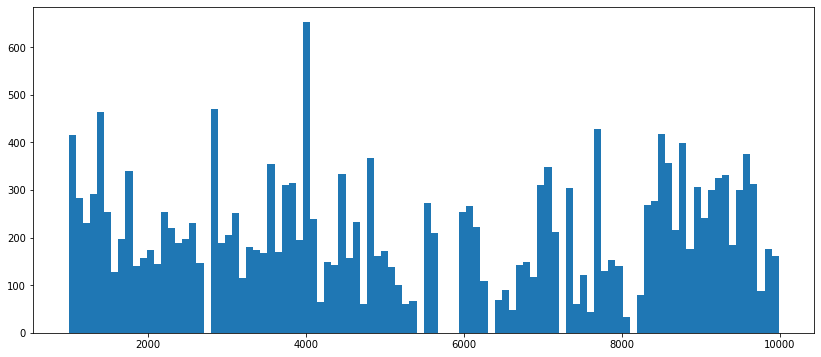

In [13]:
# distribution des codes postaux
plt.figure(figsize=[14,6])
plt.hist(df['postal_code'], 100)

In [14]:
df['postal_code'].value_counts()

7700    302
9600    256
3700    245
9500    222
4800    219
       ... 
3720      6
4171      6
7972      6
2310      6
6920      6
Name: postal_code, Length: 732, dtype: int64

### Price

(array([  23.,   76.,  122.,  265.,  403.,  502.,  765.,  764.,  844.,
        1021.,  965.,  970.,  994., 1351., 1312., 1311.,  831.,  975.,
         948.,  754.,  873.,  236.,  399.,  419.,  314.,  371.,  169.,
         165.,  278.,  102.,  158.,  204.,   97.,  105.,  157.,   77.,
         171.,   19.,   35.,  113.,   45.,  107.,   28.,   53.,   74.,
          22.,   43.,   64.,   23.,   40.]),
 array([  2500.,  21450.,  40400.,  59350.,  78300.,  97250., 116200.,
        135150., 154100., 173050., 192000., 210950., 229900., 248850.,
        267800., 286750., 305700., 324650., 343600., 362550., 381500.,
        400450., 419400., 438350., 457300., 476250., 495200., 514150.,
        533100., 552050., 571000., 589950., 608900., 627850., 646800.,
        665750., 684700., 703650., 722600., 741550., 760500., 779450.,
        798400., 817350., 836300., 855250., 874200., 893150., 912100.,
        931050., 950000.]),
 <BarContainer object of 50 artists>)

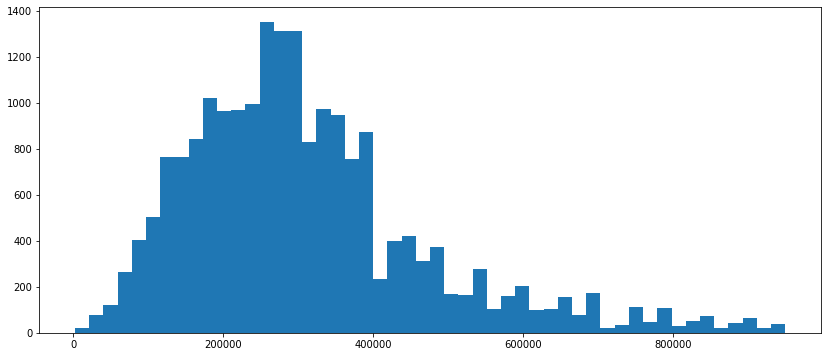

In [15]:
# distribution des prix....
plt.figure(figsize=[14,6])
plt.hist(df['price'], 50)

(20157, 18)

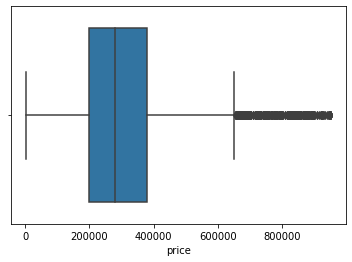

In [16]:
sns.boxplot(x=df['price'])
df.shape

(19995, 18)

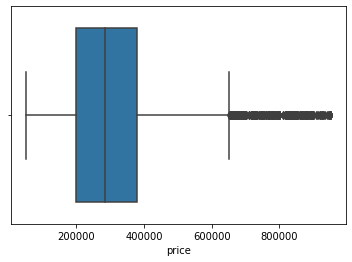

In [17]:
df = df[df['price'] > 50_000]
df = df[df['price'] < 1_000_000]

sns.boxplot(x=df['price'])
df.shape

(array([ 204.,  309.,  487.,  440.,  824.,  771.,  793., 1011.,  767.,
        1086., 1202., 1009., 1288., 1280.,  848.,  898.,  855.,  766.,
         534.,  638.,  410.,  280.,  399.,  242.,  457.,   40.,  183.,
         238.,  103.,  178.,  182.,   97.,   78.,  176.,   85.,  136.,
          42.,   39.,  103.,   41.,   38.,  114.,   14.,   52.,   77.,
          31.,   70.,   17.,   23.,   40.]),
 array([ 52000.,  69960.,  87920., 105880., 123840., 141800., 159760.,
        177720., 195680., 213640., 231600., 249560., 267520., 285480.,
        303440., 321400., 339360., 357320., 375280., 393240., 411200.,
        429160., 447120., 465080., 483040., 501000., 518960., 536920.,
        554880., 572840., 590800., 608760., 626720., 644680., 662640.,
        680600., 698560., 716520., 734480., 752440., 770400., 788360.,
        806320., 824280., 842240., 860200., 878160., 896120., 914080.,
        932040., 950000.]),
 <BarContainer object of 50 artists>)

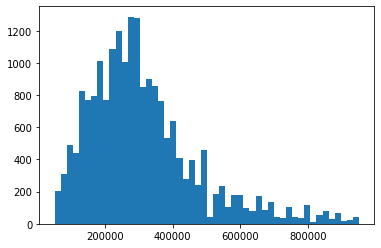

In [18]:
plt.hist(df['price'], 50)

### House area

(array([1.9309e+04, 6.3200e+02, 4.4000e+01, 5.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 3.5690e+02, 7.1280e+02, 1.0687e+03, 1.4246e+03,
        1.7805e+03, 2.1364e+03, 2.4923e+03, 2.8482e+03, 3.2041e+03,
        3.5600e+03]),
 <BarContainer object of 10 artists>)

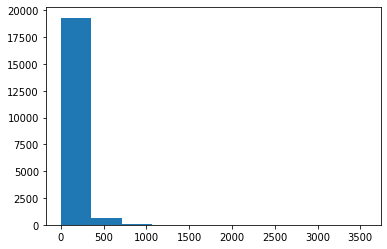

In [19]:
plt.hist(df['house_area'], 10)

(array([2.7950e+03, 1.2133e+04, 3.6870e+03, 8.9300e+02, 3.0700e+02,
        8.1000e+01, 3.3000e+01, 2.1000e+01, 1.6000e+01, 8.0000e+00]),
 array([ 20., 113., 206., 299., 392., 485., 578., 671., 764., 857., 950.]),
 <BarContainer object of 10 artists>)

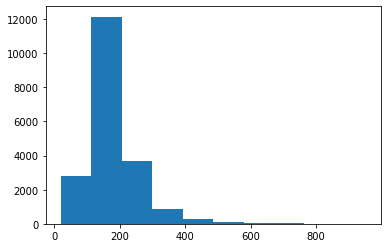

In [20]:
df = df[(df['house_area'] < 1000) & (df['house_area'] > 10)]
plt.hist(df['house_area'], 10)

<AxesSubplot:xlabel='house_area'>

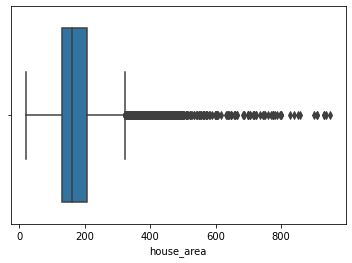

In [21]:
sns.boxplot(x=df['house_area'])

<AxesSubplot:xlabel='house_area'>

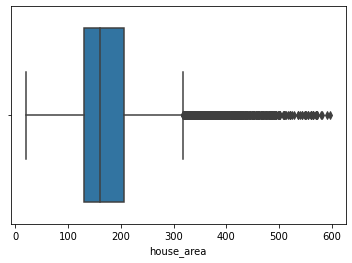

In [22]:
df = df[(df['house_area'] < 600) & (df['house_area'] > 10)]
sns.boxplot(x=df['house_area'])

(array([ 550., 5181., 7917., 3903., 1288.,  542.,  277.,  154.,   60.,
          28.]),
 array([ 20. ,  77.7, 135.4, 193.1, 250.8, 308.5, 366.2, 423.9, 481.6,
        539.3, 597. ]),
 <BarContainer object of 10 artists>)

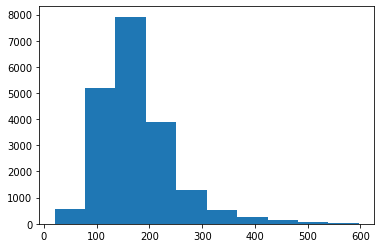

In [23]:
plt.hist(df['house_area'], 10)

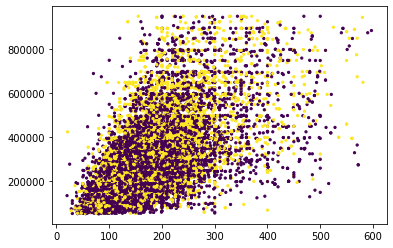

In [24]:
plt.scatter(df['house_area'],df['price'], c=df['garden'], s=5)

## Number of rooms

In [25]:
df['number_of_rooms'].value_counts()

3    10135
4     5910
2     3409
1      446
Name: number_of_rooms, dtype: int64

## State of the building

In [26]:
# Transformation en deux nouveaux types "Bon état" et "A renover"

print(df['state_of_the_building'].value_counts())
print(df.shape)
df = df[df['state_of_the_building'] != "to restore"]
print(df.shape)

def is_new(element):
    if element == "as new" or element == "good":
        element = 1
        return element
    else: 
        element = 0
        return element
    

good              5653
None              4841
as new            4197
to be done up     1974
to renovate       1936
just renovated    1187
to restore         112
Name: state_of_the_building, dtype: int64
(19900, 18)
(19788, 18)


In [27]:
df['state_of_the_building'] = df['state_of_the_building'].apply(is_new)
df['state_of_the_building'].value_counts()

0    9938
1    9850
Name: state_of_the_building, dtype: int64

In [28]:
df = df.rename(columns = {'number_of_rooms': 'number_of_bedroom'}, inplace = False)
df = df.rename(columns = {'state_of_the_building': 'is_new'}, inplace = False)

## Un peu de visualisation (result)

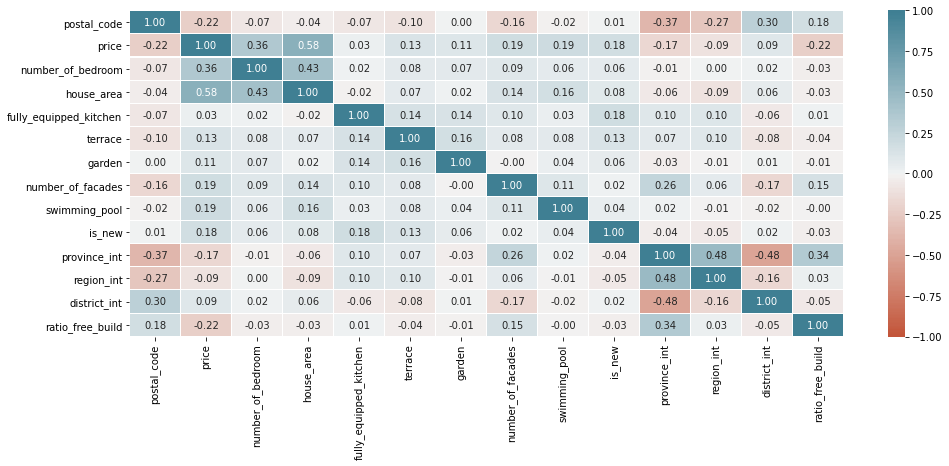

In [29]:
# Print the heatmap
plt.subplots(figsize=(16, 6))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

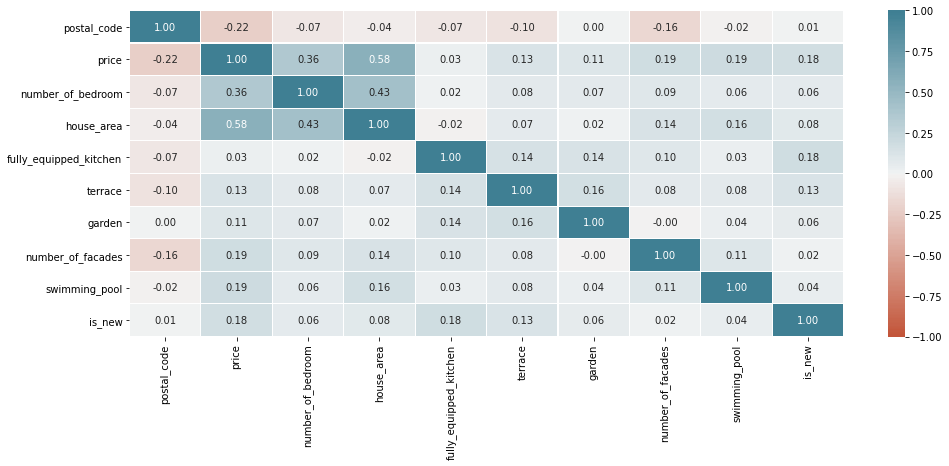

In [30]:
df_util = df.iloc[:,0:10]

# Print the heatmap for utils columns
plt.subplots(figsize=(16, 6))   
sns.heatmap(df_util.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

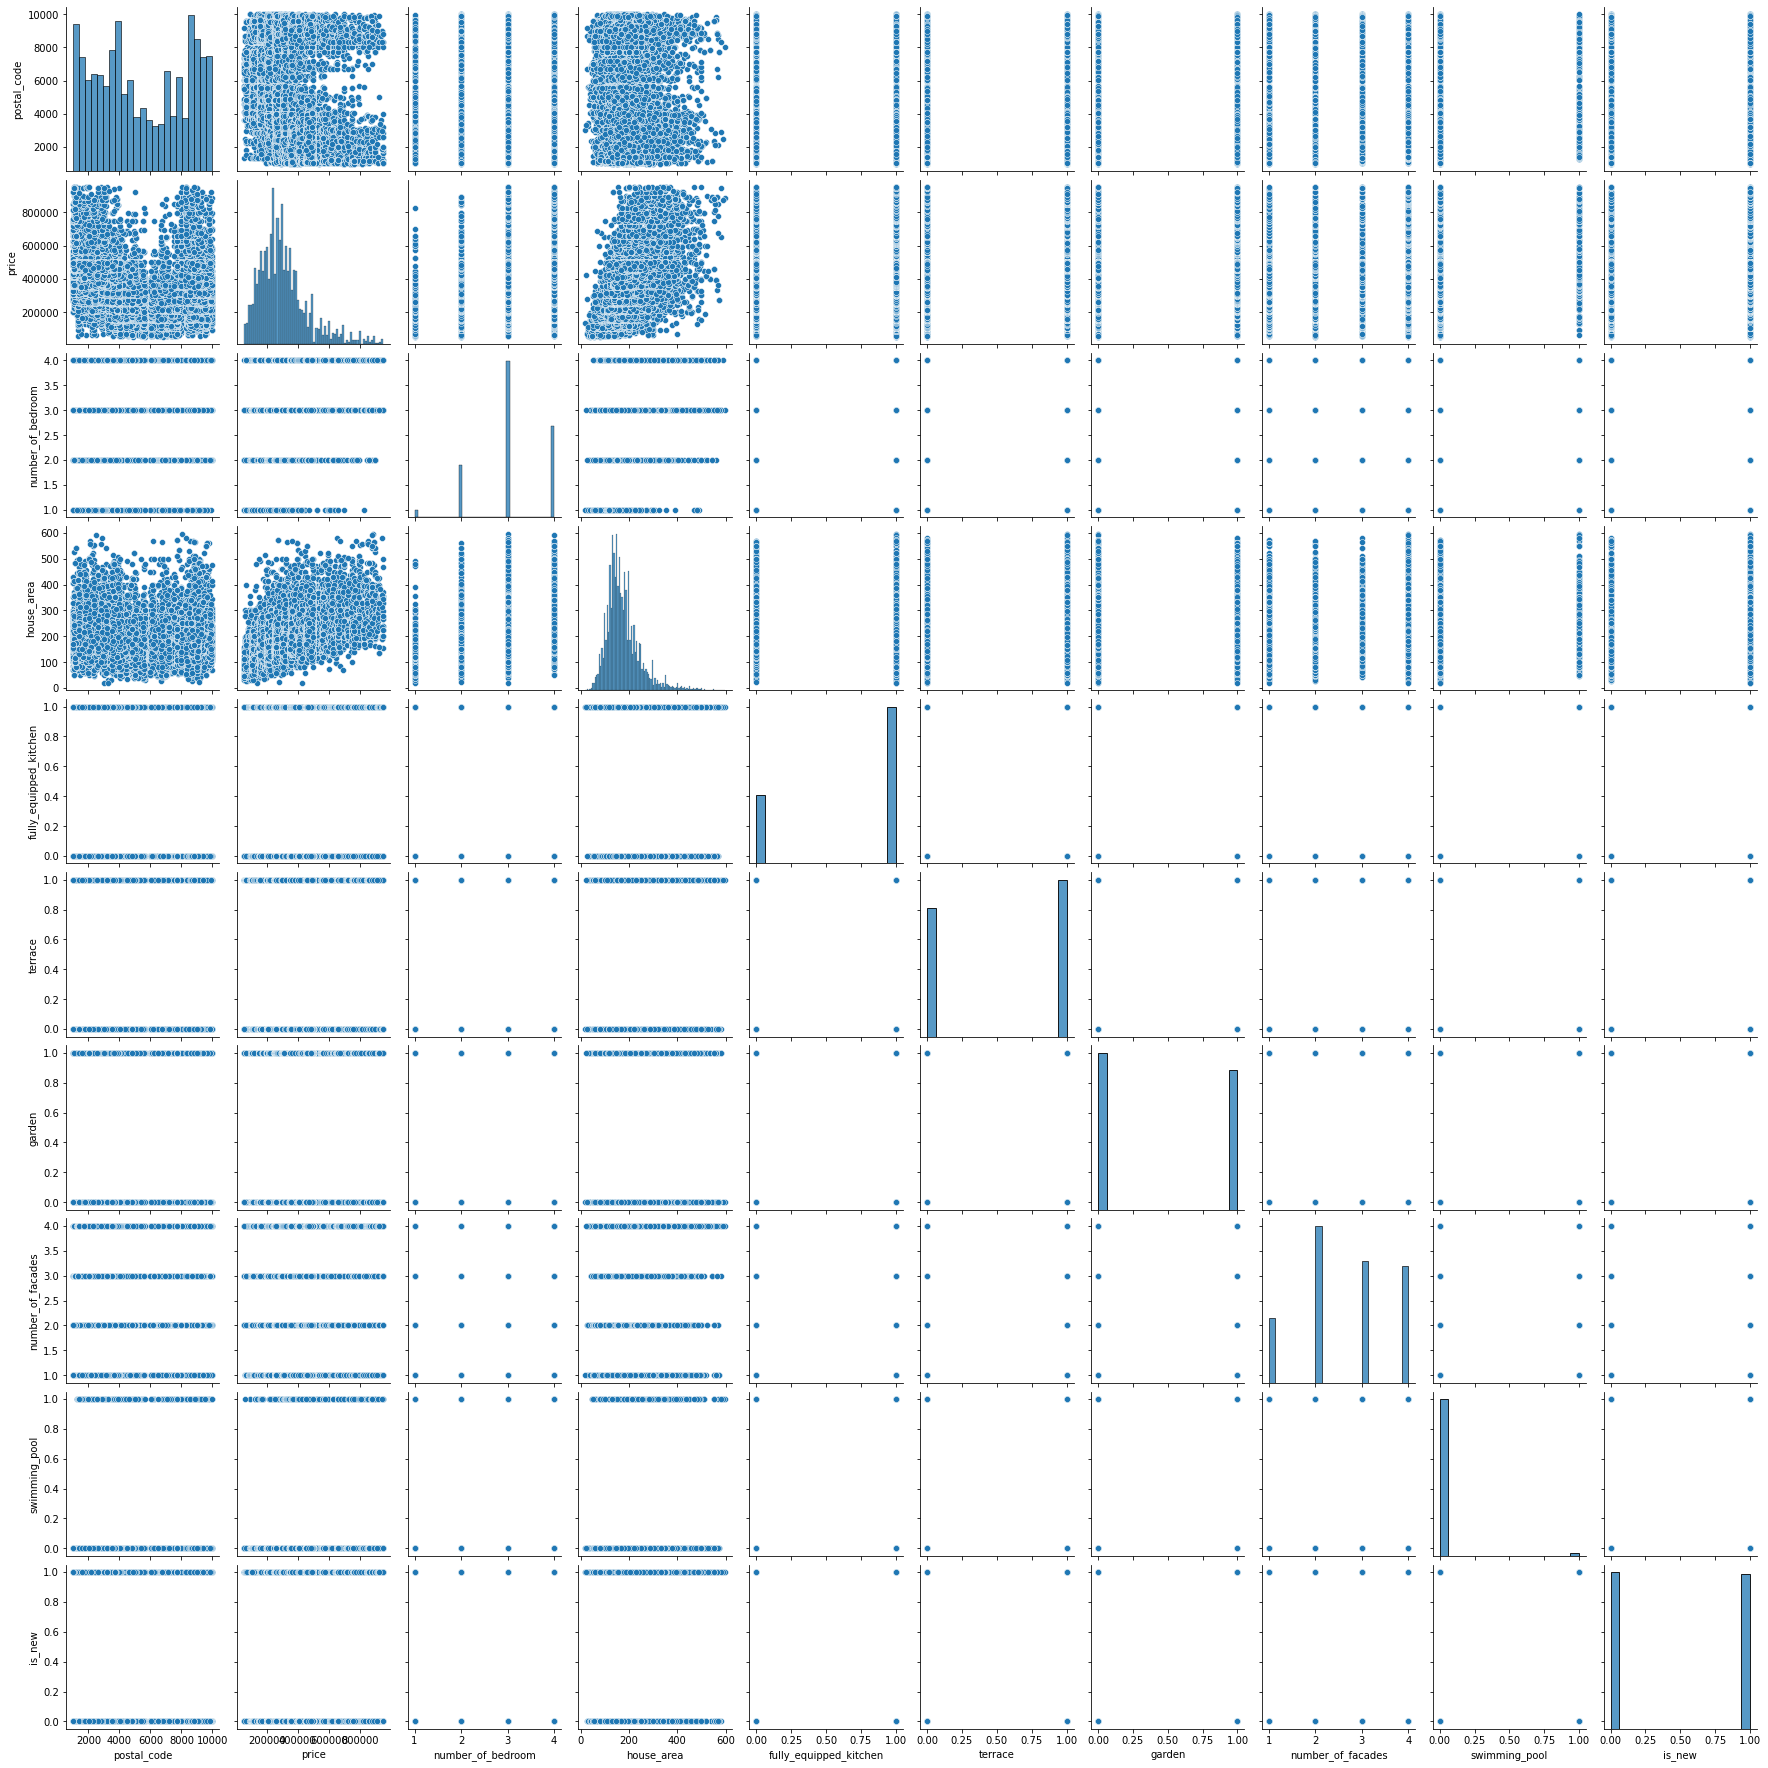

In [31]:
sns.pairplot(df_util)

In [32]:
df.dtypes

postal_code                 int64
price                       int64
number_of_bedroom           int64
house_area                  int64
fully_equipped_kitchen      int64
terrace                     int64
garden                      int64
number_of_facades           int64
swimming_pool               int64
is_new                      int64
locality                   object
district                   object
province                   object
province_int              float64
region                     object
region_int                float64
district_int              float64
ratio_free_build          float64
dtype: object

In [33]:
df.shape

(19788, 18)

In [34]:
print(df['price'].mean())

312010.98665858095


## Export

In [35]:
df.to_csv('./dataset/immoCollect52house-clean.csv')